In [1]:
import os
import io
import csv
import parsel
import pandas as pd
import html2text

In [2]:
from langdetect import detect

In [3]:
from nltkTools import detect_language

In [13]:
import fasttext

PRETRAINED_MODEL_PATH = '/home/sam/pagination_prediction/autopager/autopager/models/lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [19]:
sentences = 'je mange de la nourriture'
predictions = model.predict(sentences)
print(predictions[0][0])

__label__fr


In [4]:
h = html2text.HTML2Text()
h.ignore_links = True

In [5]:
DEFAULT_DATA_PATH = '/home/sam/pagination_prediction/autopager/autopager/data'

In [6]:
def iter_records(contain_button, file_type):
    info_path = os.path.join(DEFAULT_DATA_PATH, 'data_all.csv')
    with io.open(info_path, encoding='utf8') as f:
        for row in csv.DictReader(f):
            if row['failed']:
                continue
            if row['Page Type'] == 'button':
                if contain_button is False:
                    continue
            if row['Checked'] == file_type:
                yield row

In [7]:
def _load_html(row):
    data_path = os.path.join(DEFAULT_DATA_PATH, 'html_all')
    path = os.path.join(data_path, row['File Name'] + ".html")
    with io.open(path, encoding=row['Encoding']) as f:
        return f.read()

"\n\n                  * ![](https://image01.oneplus.net/shop/202003/18/1-M00-12-06-rB8LB15x5N6ADu3nAACrv1pu1Rk570.png)\n                  * OnePlus 8T\n                  * Store\n                  * About\n                  * Support\n                  * Community\n                  * Find a store\n                  *                   * Home X\n    OnePlus 8T\n    Store\n    About\n    Support\n    Community     Find a store\n\n                  *      Facebook\n     Twitter\n     Instagram\n\n                  *     Terms and Rules\n    Privacy and Legal\n\n                  * ![](../img/login.png)\n                  * Home\n\n__\n\nTitles only\n\n                  * Search by Title\n                  * Search by Member\n                  *                   * Search this thread only\n                  * Search this forum only\n                    * Display results as threads\n                  *                   * Advanced Search\n\n                  *                   * Products
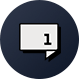

In [21]:
htmlText

In [43]:
lang_dict = {}
idx = 1
for row in iter_records(True, 'T'):
    html = _load_html(row)
    htmlText = h.handle(html)
    htmlText = htmlText.replace('\n','')
#     lan = detect(htmlText) #detect_lang
    #lan = detect_language(htmlText) #nltk
    predictions = model.predict(htmlText) #fasttext
    lan = predictions[0][0].replace("__label__","")
    if lan not in lang_dict:
        lang_dict[lan] = 1
    else:
        lang_dict[lan]+=1
#     print(f"File Name: {row['File Name']}, lang: {lan}")
    if int(row['File Name']) != idx:
        print(f"n/a")
        print(f"{lan}")
        idx+=2
    else:
        print(f"{lan}")
        idx+=1

en
en
en
en
en
en
en
en
ru
zh
zh
zh
zh
ru
ru
pl
pl
pl
pl
fr
en
en
en
en
en
en
zh
en
zh
zh
zh
zh
en
en
en
en
en
en
zh
en
fa
fa
en
en
id
en
en
en
en
en
nl
ru
nl
de
de
en
en
fr
fr
ja
ja
en
en
en
de
de
de
en
en
es
en
en
zh
en
en
en
en
en
en
ru
ru
ja
id
en
en
ja
ja
ja
de
de
en
en
en
en
en
en
en
en
en
en
en
pt
pt
pt
es
es
es
en
en
en
en
en
en
en
en
en
en
en
en
en
en
es
es
es
en
zh
en
en
en
en
es
en
en
en
en
en
en
en
en
en
en
zh
en
en
en
en
en
en
en
en
en
en
en
de
de
de
nl
nl
it
it
it
en
en
en
en
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
zh
en
en
en
en
en
en
en
nl
en
en
en
bn
bn
bn
bn
en
en
en
en
en
en
en
en
en
en
en
ja
ja
fa
en
en
en
nl
nl
en
en
en
en
en
en
en
en
en
en
en
es
en
it
de
de
ja
cs
cs
n/a
de
de
ru
ru
en
en
en
en
en
en
en
pt
pt
n/a
el
el
el
es
es
es
es
es
en
es
es
ja
ja
en
no
no
en
en
en
es
es
es
en
en
en
en
ja
ja
en
en
en
en
en
en
en
hi
hi
hi
zh
zh
zh
en
en
en
en
en
en
de
de
de
nl
nl
en
en
ja


In [35]:
idx

326

In [24]:
lang_dict

{'__label__en': 168,
 '__label__ru': 8,
 '__label__zh': 53,
 '__label__pl': 4,
 '__label__fr': 3,
 '__label__fa': 3,
 '__label__id': 2,
 '__label__nl': 9,
 '__label__de': 17,
 '__label__ja': 14,
 '__label__es': 19,
 '__label__pt': 5,
 '__label__it': 4,
 '__label__bn': 4,
 '__label__cs': 2,
 '__label__el': 3,
 '__label__no': 2,
 '__label__hi': 3}

In [25]:
def iter_test_records():
    info_path = os.path.join(DEFAULT_DATA_PATH, 'test_data/test_data.csv')
    with io.open(info_path, encoding='utf8') as f:
        for row in csv.DictReader(f):
            if row['Checked'] == 'T':
                yield row
#         test_csv = pd.read_csv(info_path)
#         test_csv = test_csv.fillna('N/A')
#         for idx, row in test_csv.iterrows():
#             yield row
def _load_test_html(row):
    data_path = os.path.join(DEFAULT_DATA_PATH, 'test_data/html')
    path = os.path.join(data_path, str(row['File Name']) + ".html")
    with io.open(path, encoding=row['Encoding']) as f:
        return f.read()

In [45]:
test_lang_dict = {}
idx = 1
for row in iter_test_records():
    html = _load_test_html(row)
    htmlText = h.handle(html)
    htmlText = htmlText.replace('\n','')
#     lan = detect(htmlText) #detect_lang
    #lan = detect_language(htmlText) #nltk
    predictions = model.predict(htmlText) #fasttext
    lan = predictions[0][0].replace("__label__","")
    if lan not in test_lang_dict:
        test_lang_dict[lan] = 1
    else:
        test_lang_dict[lan] += 1
    if int(row['File Name']) != idx:
        print(f"n/a")
        print(f"{lan}")
        idx+=2
    else:
        print(f"{lan}")
        idx+=1
#     print(f"File Name: {row['File Name']}, lang: {lan}")

en
zh
zh
zh
en
zh
en
en
en
en
en
en
en
en
en
en
zh
en
en
en
en
en
en
en
en
en
en
zh
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
zh
zh
en
en
en
en
en
en
en
zh
en
zh
zh
en
en
en
en
ja
ja
ja
zh
zh
zh
en
en
zh
ja
ja
en
ja
ja
en
en
ja
ja
ru
en
en
en
zh
zh
zh
ko
ko
ko
ko
en
zh
zh
zh
id
en
zh
zh
en


In [27]:
test_lang_dict

{'__label__zh': 24,
 '__label__en': 61,
 '__label__ja': 9,
 '__label__ru': 1,
 '__label__ko': 4,
 '__label__id': 1}